pip install phik
pip install pandas-profiling
pip install missingno

In [1]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from pandas_profiling import ProfileReport
import pandas as pd

from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import f_classif
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import missingno as msgn
from phik.report import plot_correlation_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pylab as py
import plotly.express as px
from collections import Counter
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import f_classif
from sklearn.model_selection import StratifiedKFold

from sklearn.preprocessing import PowerTransformer

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import shap

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
from sklearn.model_selection import cross_validate

from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
from numpy import argmax
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

In [2]:
label = ['FLIGHT_REASON']

categorical_str1 = [
'ARR',
'DEP',
'ID_PNR_ITI_CABCLASS_1',
'ID_PNR_ITI_SELCLASS_1',
'JRNY_TYP',
'NTNLT1' ] 

categorical_str2 = [
'ID_PNR_ITI_CABCLASS_2',
'ID_PNR_ITI_SELCLASS_2']

categorical_str = categorical_str1 + categorical_str2

categorical_int1 = [
'arrival_interval_1',
'flight_month_1',
'flight_weekday_1',
'pnr_create_month',
'pnr_create_weekday',
'pnr_workhour_interval']

categorical_int2 = [
'arrival_interval_2',
'flight_month_2',
'flight_weekday_2']

categorical_int = categorical_int1 + categorical_int2

numerical1 = [
'CUST_AGE',
'diff_pnr_firstflight', 
'flight_duration_1']

numerical2 = [
'diff_second_firstflight',
'flight_duration_2']

numerical = numerical1+numerical2

passthrough = [
'dep_nat_flag',
'arr_nat_flag',
'CHILD_FLG',
'FAMILY_FLG',
'INFANT_FLG',
'PET_FLG',
'POS_POC_SAME_FLG',
'SAME_SRNAME_FLG',
'SEAT_SELECT_FLG',
'SPORT_FLG',
'XBAG_FIRST_FLT_FLG',
'XBAG_LAST_FLT_FLG',
'XBAG_TWO_WAY_FLT_FLG',
'PNR_PSSG_COUNT']

drops = [
'ID_PNR_CREATION_DTIME_GMT',
'ID_PNR_CREATION_YMD',
'ID_PNR_ITI_ARR_APT_1',
'ID_PNR_ITI_ARR_APT_2',
'ID_PNR_ITI_DEP_APT_1',
'ID_PNR_ITI_DEP_APT_2',
'ID_TKT_NO',
'OND',
'PNR_NO',
'date']

In [3]:
df = pd.read_csv(r'train.csv', index_col='Unnamed: 0')
df.shape

(941160, 37)

In [4]:
df.isna().sum()

ARR                             0
DEP                             0
ID_PNR_ITI_CABCLASS_1           0
ID_PNR_ITI_CABCLASS_2      126438
ID_PNR_ITI_SELCLASS_1           0
ID_PNR_ITI_SELCLASS_2      126438
JRNY_TYP                        0
NTNLT1                     269937
arrival_interval_1              0
arrival_interval_2              0
flight_month_1                  0
flight_month_2             126438
flight_weekday_1                0
flight_weekday_2           126438
pnr_create_month                0
pnr_create_weekday              0
pnr_workhour_interval           0
CUST_AGE                   260750
diff_pnr_firstflight            0
diff_second_firstflight    126438
flight_duration_1               0
flight_duration_2          126438
CHILD_FLG                       0
FAMILY_FLG                      0
INFANT_FLG                      0
PET_FLG                         0
POS_POC_SAME_FLG                0
SAME_SRNAME_FLG                 0
SEAT_SELECT_FLG                 0
SPORT_FLG     

In [5]:
for col in numerical1+numerical2:
    print(df[col].describe())
    print('----------------')

count    680410.000000
mean         43.797472
std          13.988784
min           0.000000
25%          35.000000
50%          44.000000
75%          52.000000
max         120.000000
Name: CUST_AGE, dtype: float64
----------------
count    941160.000000
mean         53.219619
std          78.709062
min           0.000000
25%           7.000000
50%          21.000000
75%          60.000000
max         365.000000
Name: diff_pnr_firstflight, dtype: float64
----------------
count    941160.000000
mean        204.205640
std          91.503418
min           0.000000
25%         125.000000
50%         225.000000
75%         270.000000
max         460.000000
Name: flight_duration_1, dtype: float64
----------------
count    814722.000000
mean          9.560866
std          18.098346
min           0.000000
25%           3.000000
50%           4.000000
75%           9.000000
max         364.000000
Name: diff_second_firstflight, dtype: float64
----------------
count    814722.000000
mean        1

In [6]:
def evaluate_model_with_CV(X, y, model):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    scores = cross_validate(pipeline, X, y, scoring=['accuracy', 'f1_weighted'], n_jobs=-1, 
                        return_estimator=True, return_train_score=True, cv=cv)
    # ['fit_time', 'score_time', 'estimator', 'test_accuracy', 'train_accuracy', 'test_f1_weighted', 'train_f1_weighted']
    return scores

In [7]:
def print_metrics(y_pred, y_test, model):
    print("Model results: ", type(model).__name__)
    print(classification_report(y_test, y_pred))
    print("Confusion matrix:")
    cm = confusion_matrix(y_test,y_pred, labels= model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels= model.classes_)
    disp.plot()

In [8]:
def create_pipeline_rf():
    
    numeric_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    numeric_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
        ('scaler', StandardScaler())])

    categorical_str_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    categorical_str_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='-')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    categorical_int_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    categorical_int_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-100)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer1, numerical1),
                                                  ('num2', numeric_transformer2, numerical2),
                                                  ('cat_str1', categorical_str_transformer1, categorical_str1),
                                                  ('cat_str2', categorical_str_transformer2, categorical_str2),
                                                  ('cat_int1', categorical_int_transformer1, categorical_int1),
                                                  ('cat_int2', categorical_int_transformer2, categorical_int2)], 
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k='all')),
                          ('classifier', RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0))])
    
    return pipeline

In [9]:
def random_undersampling(X, y):
    
    num_sample = y[y=='STUDENT'].shape[0]
    index_1 = y[y=='BUSINESS'].sample(num_sample, random_state=3).index
    index_2 = y[y=='LEISURE'].sample(num_sample, random_state=3).index
    index_3 = y[y=='SECOND HOME'].sample(num_sample, random_state=3).index
    index_4 = y[y=='STUDENT'].index
    
    all_indexes = list(index_1) + list(index_2) + list(index_3) + list(index_4)

    X_ = X.loc[all_indexes]
    y_ = y[all_indexes]
    
    return X_, y_

## base model

Model results:  Pipeline
              precision    recall  f1-score   support

    BUSINESS       0.97      0.98      0.98     85735
     LEISURE       0.96      0.93      0.94     57021
 SECOND HOME       0.97      0.98      0.97     45265
     STUDENT       0.98      0.40      0.57       211

    accuracy                           0.97    188232
   macro avg       0.97      0.82      0.86    188232
weighted avg       0.97      0.97      0.97    188232

Confusion matrix:


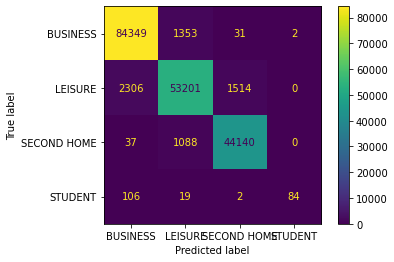

In [10]:
# base model for data

y = df['FLIGHT_REASON']
X = df[categorical_str+categorical_int+numerical+passthrough]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=1)

pipe1 = create_pipeline_rf()

pipe1.fit(X_train, y_train)
preds = pipe1.predict(X_test)
print_metrics(preds, y_test, pipe1)

## balancing data with random undersampling

Features [0 0] are constant.
invalid value encountered in true_divide


Model results:  Pipeline
              precision    recall  f1-score   support

    BUSINESS       0.92      0.94      0.93       212
     LEISURE       0.94      0.86      0.90       212
 SECOND HOME       0.93      0.98      0.96       211
     STUDENT       0.96      0.96      0.96       211

    accuracy                           0.94       846
   macro avg       0.94      0.94      0.94       846
weighted avg       0.94      0.94      0.94       846

Confusion matrix:


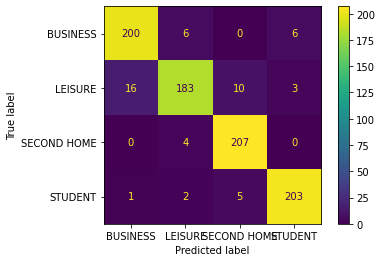

In [11]:
# data blancing with random undersampling
y = df['FLIGHT_REASON']
X = df[categorical_str+categorical_int+numerical+passthrough]

X, y = random_undersampling(X, y)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=1)

pipe2 = create_pipeline_rf()

pipe2.fit(X_train, y_train)
preds = pipe2.predict(X_test)
print_metrics(preds, y_test, pipe2)

## feature importance

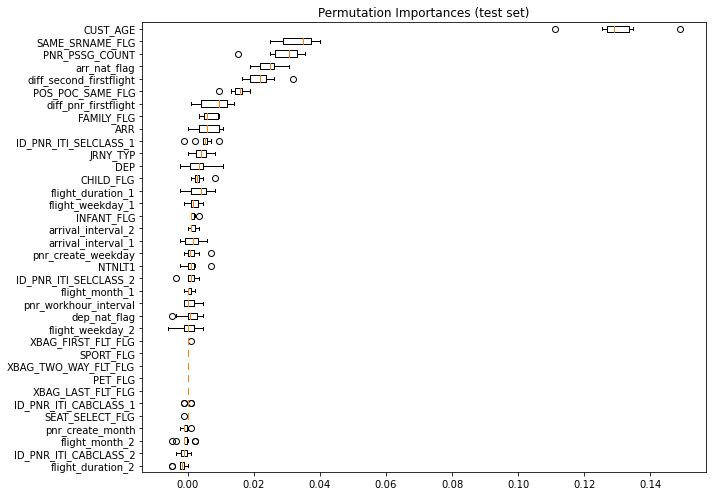

In [12]:
from sklearn.inspection import permutation_importance

result = permutation_importance(pipe2, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [13]:
df.isna().sum()

ARR                             0
DEP                             0
ID_PNR_ITI_CABCLASS_1           0
ID_PNR_ITI_CABCLASS_2      126438
ID_PNR_ITI_SELCLASS_1           0
ID_PNR_ITI_SELCLASS_2      126438
JRNY_TYP                        0
NTNLT1                     269937
arrival_interval_1              0
arrival_interval_2              0
flight_month_1                  0
flight_month_2             126438
flight_weekday_1                0
flight_weekday_2           126438
pnr_create_month                0
pnr_create_weekday              0
pnr_workhour_interval           0
CUST_AGE                   260750
diff_pnr_firstflight            0
diff_second_firstflight    126438
flight_duration_1               0
flight_duration_2          126438
CHILD_FLG                       0
FAMILY_FLG                      0
INFANT_FLG                      0
PET_FLG                         0
POS_POC_SAME_FLG                0
SAME_SRNAME_FLG                 0
SEAT_SELECT_FLG                 0
SPORT_FLG     

## all models

In [14]:
import xgboost
import lightgbm
import sklearn
import time
from tqdm import tqdm
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
from sklearn.metrics import average_precision_score, accuracy_score, balanced_accuracy_score, recall_score, precision_score, f1_score

In [15]:
def create_pipeline_without_clf(clf_name, clf_object):
    
    numeric_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())])
    numeric_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0.0)),
        ('scaler', StandardScaler())])

    categorical_str_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    categorical_str_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value='-')),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    categorical_int_transformer1 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-99)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])
    categorical_int_transformer2 = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=-100)),
        ('one-hot', OneHotEncoder(handle_unknown='ignore'))])

    preprocessor = ColumnTransformer(
                                    transformers=[
                                                  ('num1', numeric_transformer1, numerical1),
                                                  ('num2', numeric_transformer2, numerical2),
                                                  ('cat_str1', categorical_str_transformer1, categorical_str1),
                                                  ('cat_str2', categorical_str_transformer2, categorical_str2),
                                                  ('cat_int1', categorical_int_transformer1, categorical_int1),
                                                  ('cat_int2', categorical_int_transformer2, categorical_int2)], 
                                    n_jobs = -1,
                                    transformer_weights = None,
                                    remainder='passthrough')

    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                          ('f_selector', SelectKBest(f_classif, k='all')),
                          (clf_name, clf_object)], verbose=False)
    
    return pipeline

In [16]:
CLASSIFIERS = [est for est in all_estimators() if issubclass(est[1], ClassifierMixin)]
removed_classifiers = [
    ("CheckingClassifier", sklearn.utils._mocking.CheckingClassifier),
    ("ClassifierChain", sklearn.multioutput.ClassifierChain),
    ("ComplementNB", sklearn.naive_bayes.ComplementNB),
    ("GradientBoostingClassifier", sklearn.ensemble.gradient_boosting.GradientBoostingClassifier,),
    ("GaussianProcessClassifier", sklearn.gaussian_process.gpc.GaussianProcessClassifier,),
    ("HistGradientBoostingClassifier", sklearn.ensemble._hist_gradient_boosting.gradient_boosting.HistGradientBoostingClassifier,),
    ("MLPClassifier", sklearn.neural_network.multilayer_perceptron.MLPClassifier),
    ("LogisticRegressionCV", sklearn.linear_model.logistic.LogisticRegressionCV),
    ("MultiOutputClassifier", sklearn.multioutput.MultiOutputClassifier),
    ("MultinomialNB", sklearn.naive_bayes.MultinomialNB),
    ("OneVsOneClassifier", sklearn.multiclass.OneVsOneClassifier),
    ("OneVsRestClassifier", sklearn.multiclass.OneVsRestClassifier),
    ("OutputCodeClassifier", sklearn.multiclass.OutputCodeClassifier),
    ("RadiusNeighborsClassifier", sklearn.neighbors.classification.RadiusNeighborsClassifier,),
    ("VotingClassifier", sklearn.ensemble.voting.VotingClassifier),
]

for i in removed_classifiers:
    CLASSIFIERS.pop(CLASSIFIERS.index(i))
    
CLASSIFIERS.append(("XGBClassifier", xgboost.XGBClassifier))
CLASSIFIERS.append(("LGBMClassifier", lightgbm.LGBMClassifier))

In [17]:
random_state = 10
Accuracy_mean = []
Accuracy_std = []
F1_mean = []
F1_std = []
names = []
TIME = []
predictions = {}
models = {}

for name, model in tqdm(CLASSIFIERS):
    start = time.time()
    try:
        if "random_state" in model().get_params().keys():
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state, class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model(random_state=random_state))
        else:
            if "class_weight" in model().get_params().keys():
                pipeline = create_pipeline_without_clf("classifier", model(class_weight='balanced'))
            else:
                pipeline = create_pipeline_without_clf("classifier", model())
                
                                   
        results = evaluate_model_with_CV(X, y, model)
                        
        names.append(name)
        Accuracy_mean.append(results['test_accuracy'].mean())
        Accuracy_std.append(results['test_accuracy'].std())
        F1_mean.append(results['test_f1_weighted'].mean())
        F1_std.append(results['test_f1_weighted'].std())
        TIME.append(results['fit_time'].mean())
    
    except Exception as exception:
        print(name + " model failed to execute")
        print(exception)
                                   
scores = pd.DataFrame(
    {   "Model": names,
        "Accuracy Mean": Accuracy_mean,
        "Accuracy Std": Accuracy_std,
        "F1-Score Mean": F1_mean,
        "F1-Score Std": F1_std,
        "Time Taken": TIME, })      

 90%|█████████████████████████████████████████████████████████████████████████▌        | 26/29 [00:22<00:02,  1.40it/s]

StackingClassifier model failed to execute
__init__() missing 1 required positional argument: 'estimators'


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:25<00:00,  1.12it/s]


In [18]:
scores.sort_values(by='F1-Score Mean', ascending=False)

,Model,Accuracy Mean,Accuracy Std,F1-Score Mean,F1-Score Std,Time Taken
26,XGBClassifier,0.938738,0.012164,0.938539,0.012055,1.769198
21,RandomForestClassifier,0.935663,0.013034,0.935260,0.013000,1.084600
27,LGBMClassifier,0.933771,0.013838,0.933478,0.013766,0.665200
15,LogisticRegression,0.920294,0.011407,0.920041,0.011319,0.230400
25,SVC,0.920055,0.013701,0.919170,0.013776,0.589587
8,ExtraTreesClassifier,0.916270,0.010536,0.915998,0.010392,1.384000
1,BaggingClassifier,0.908225,0.012574,0.908044,0.012640,0.546200
14,LinearSVC,0.905865,0.013365,0.905364,0.013073,0.252200
3,CalibratedClassifierCV,0.905627,0.016469,0.904774,0.016157,0.816198
24,SGDClassifier,0.901367,0.017016,0.901224,0.016904,0.100217


In [19]:
final_models = scores[(scores['F1-Score Mean']>0.9)].nlargest(5, 'F1-Score Mean')
final_models

,Model,Accuracy Mean,Accuracy Std,F1-Score Mean,F1-Score Std,Time Taken
26,XGBClassifier,0.938738,0.012164,0.938539,0.012055,1.769198
21,RandomForestClassifier,0.935663,0.013034,0.935260,0.013000,1.084600
27,LGBMClassifier,0.933771,0.013838,0.933478,0.013766,0.665200
15,LogisticRegression,0.920294,0.011407,0.920041,0.011319,0.230400
25,SVC,0.920055,0.013701,0.919170,0.013776,0.589587


## tuning

In [20]:
final_models.Model.values

array(['XGBClassifier', 'RandomForestClassifier', 'LGBMClassifier',
       'LogisticRegression', 'SVC'], dtype=object)

In [21]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [22]:
classifier_objects = {
    'RandomForestClassifier' : RandomForestClassifier(random_state=0, n_jobs=-1),
    'LGBMClassifier' : LGBMClassifier(random_state=0, n_jobs=-1),
    'XGBClassifier' : XGBClassifier(random_state=0, n_jobs=-1),
    'LogisticRegression' : LogisticRegression(random_state=0),
    'SVC' : SVC(random_state=0),
}

In [23]:
params_list = {
'RandomForestClassifier' : {'max_depth': [5,10, 20, None], 'min_samples_leaf': [1, 2, 3, 5,10], 
                            'min_samples_split': [2, 3, 5], 'n_estimators': [100, 250, 500]},
'LGBMClassifier' : {'num_leaves': [5,10,15,20,25,31], 'learning_rate': [0.005, 0.01],
                          'max_depth': [-1, 5,10, 20], 'min_samples_split': [2,3,5],
                          'n_estimators': [100, 250,500]},
'XGBClassifier' : {'min_child_weight': [1, 5, 10], 'gamma': [0.5, 1, 1.5, 2, 5],
                   'subsample': [0.6, 0.8, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0],
                    'max_depth': [3, 4, 5]},
'LogisticRegression':{'C':np.logspace(-3,3,7), 'penalty':["l1","l2"]},
'SVC':{'C': [ 0.1, 1, 10, 100], 'kernel':['poly', 'rbf'], 
         'degree':[2,3,4,5], 'gamma':[1,0.1,0.001,0.0001]}
}

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

In [25]:
def prepare_param_grid(params):
    
    param_grid = {}
    for key, value in params.items():
        new_key = 'classifier__' + key 
        param_grid[new_key] = value
    return param_grid

In [26]:
def grid_search(classifier, clf):
    
    param_grid = prepare_param_grid(params_list[clf])
    grid_search = GridSearchCV(classifier, param_grid=param_grid, cv = 5, scoring='f1_weighted', verbose = -1,  n_jobs = 16)
    grid_search.fit(X_train, y_train)
    gs_preds = grid_search.predict(X_test)
    
    return gs_preds, grid_search.best_params_, grid_search.cv_results_['mean_test_score']

In [27]:
k=0
gs_results = pd.DataFrame(columns=['Model', 'acc_score', 'best_params', 'F1-score', 'mean val score', 'clf_report'])

for model in final_models.Model.values:
    
    k+=1
    try:
        pipeline = create_pipeline_without_clf("classifier", classifier_objects[model])
        preds, best_params, mean_val_score = grid_search(pipeline, model)
    except:
        print('an error with', model)
        continue
    f1_s = f1_score(y_test, preds, average='weighted')
    acc_score = accuracy_score(y_test, preds)
    clf_report = classification_report(y_test, preds)
    
    gs_results = gs_results.append(pd.DataFrame({'Model':model,'acc_score':[acc_score], 'best_params':str(best_params),
                                           'F1-score':f1_s, 'mean val score':[mean_val_score],'clf_report':clf_report}, index=[k]))

[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    5.1s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   17.8s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   38.1s
[Parallel(n_jobs=16)]: Done 1120 tasks      | elapsed:  1.2min
[Parallel(n_jobs=16)]: Done 1768 tasks      | elapsed:  2.0min
[Parallel(n_jobs=16)]: Done 2025 out of 2025 | elapsed:  2.3min finished
Features [0 0] are constant.
invalid value encountered in true_divide
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  40 tasks      | elapsed:    4.6s
[Parallel(n_jobs=16)]: Done 256 tasks      | elapsed:   18.0s
[Parallel(n_jobs=16)]: Done 616 tasks      | elapsed:   46.0s
[Parallel(n_jobs=16)]: Done 900 out of 900 | elapsed:  1.2min finished
Features [0 0] are constant.
invalid value encountered in true_divide
[Parallel(n_jobs=16)]: Using backend LokyBackend with 16 concurr

In [28]:
gs_results.sort_values(by='F1-score', ascending=False)

,Model,acc_score,best_params,F1-score,mean val score,clf_report
2,RandomForestClassifier,0.940898,"{'classifier__max_depth': None, 'classifier__m...",0.940255,"[0.8829248277330951, 0.8914153193277887, 0.889...",precision recall f1-score ...
3,LGBMClassifier,0.937352,"{'classifier__learning_rate': 0.01, 'classifie...",0.936946,"[0.846771466801466, 0.8867673703654418, 0.8983...",precision recall f1-score ...
1,XGBClassifier,0.934988,"{'classifier__colsample_bytree': 0.6, 'classif...",0.934625,"[0.9296756657586727, 0.9303632358569169, 0.930...",precision recall f1-score ...
5,SVC,0.929078,"{'classifier__C': 10, 'classifier__degree': 2,...",0.928503,"[0.9179421748558688, 0.1156131630809802, 0.920...",precision recall f1-score ...
4,LogisticRegression,0.920804,"{'classifier__C': 1.0, 'classifier__penalty': ...",0.920203,"[nan, 0.7943705028934065, nan, 0.8895613550735...",precision recall f1-score ...


In [29]:
{k.replace('classifier__', ''): v for k,v in eval(gs_results.loc[1, 'best_params']).items()}

{'colsample_bytree': 0.6,
 'gamma': 0.5,
 'max_depth': 4,
 'min_child_weight': 1,
 'subsample': 1.0}

## ensemble, stacking

In [30]:
from sklearn.ensemble import VotingClassifier

clf1 = create_pipeline_without_clf('rfc',RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500))
clf2 = create_pipeline_without_clf('lgb',LGBMClassifier(learning_rate=0.01,max_depth=-1, min_samples_split=2, num_leaves=20, n_estimators= 500))
clf3 = create_pipeline_without_clf('xgb', XGBClassifier(colsample_bytree=0.6, gamma= 0.5, max_depth=4, min_child_weight=1, subsample= 1.0))


    
eclf = VotingClassifier(
    estimators=[('rfc', clf1), ('lgb', clf2), ('xgb', clf3)],
    voting='hard')
    

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'Light GBM', 'XGBoost', 'Voting']):
    scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=5, n_jobs=-1)
    print("%s F1: %0.2f (+/- %0.2f) " % (label, scores.mean(), scores.std()))


Random Forest F1: 0.93 (+/- 0.01) 
Light GBM F1: 0.92 (+/- 0.01) 
XGBoost F1: 0.93 (+/- 0.00) 
Voting F1: 0.93 (+/- 0.00) 


In [31]:
from sklearn.ensemble import VotingClassifier

clf1 = create_pipeline_without_clf('rfc',RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500))
clf2 = create_pipeline_without_clf('svc',SVC(C= 10, degree= 2, gamma= 0.1, kernel= 'rbf'))
clf3 = create_pipeline_without_clf('log', LogisticRegression(C= 1.0, penalty= 'l2'))


    
eclf = VotingClassifier(
    estimators=[('rfc', clf1), ('svc', clf2), ('log', clf3)],
    voting='hard')
    

for clf, label in zip([clf1, clf2, clf3, eclf], ['Random Forest', 'SVC', 'Log', 'Voting']):
    scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=5, n_jobs=-1)
    print("%s F1: %0.2f (+/- %0.2f) " % (label, scores.mean(), scores.std()))


Random Forest F1: 0.93 (+/- 0.01) 
SVC F1: 0.91 (+/- 0.01) 
Log F1: 0.91 (+/- 0.01) 
Voting F1: 0.93 (+/- 0.01) 


In [32]:
from sklearn.ensemble import VotingClassifier

clf1 = create_pipeline_without_clf('rfc',RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500))
clf2 = create_pipeline_without_clf('lgb',LGBMClassifier(learning_rate=0.01,max_depth=-1, min_samples_split=2, num_leaves=20, n_estimators= 500))
clf3 = create_pipeline_without_clf('xgb', XGBClassifier(colsample_bytree=0.6, gamma= 0.5, max_depth=4, min_child_weight=1, subsample= 1.0))
clf4 = create_pipeline_without_clf('svc',SVC(C= 10, degree= 2, gamma= 0.1, kernel= 'rbf'))
clf5 = create_pipeline_without_clf('log', LogisticRegression(C= 1.0, penalty= 'l2'))

    
eclf = VotingClassifier(
    estimators=[('rfc', clf1), ('lgb', clf2), ('xgb', clf3), ('svc', clf4), ('log', clf5)],
    voting='hard', n_jobs=-1)
    

for clf, label in zip([clf1, clf2, clf3, clf4, clf5, eclf], ['Random Forest', 'Light GBM', 'XGBoost', 'SVC', 'Log', 'Voting']):
    scores = cross_val_score(clf, X, y, scoring='f1_weighted', cv=5, n_jobs=-1)
    print("%s F1: %0.4f (+/- %0.4f) " % (label, scores.mean(), scores.std()))


Random Forest F1: 0.9294 (+/- 0.0092) 
Light GBM F1: 0.9249 (+/- 0.0051) 
XGBoost F1: 0.9324 (+/- 0.0019) 
SVC F1: 0.9122 (+/- 0.0091) 
Log F1: 0.9131 (+/- 0.0062) 
Voting F1: 0.9318 (+/- 0.0049) 


with voting classifier the f1-score is increased and also variance is decreased

Model results:  VotingClassifier
              precision    recall  f1-score   support

    BUSINESS       0.91      0.95      0.93       212
     LEISURE       0.94      0.87      0.90       211
 SECOND HOME       0.95      0.96      0.96       212
     STUDENT       0.96      0.98      0.97       211

    accuracy                           0.94       846
   macro avg       0.94      0.94      0.94       846
weighted avg       0.94      0.94      0.94       846

Confusion matrix:
0.941279585706372


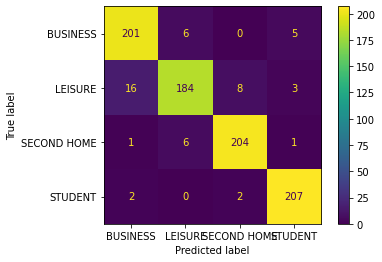

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

eclf = VotingClassifier(
    estimators=[('rfc', clf1), ('lgb', clf2), ('xgb', clf3), ('svc', clf4), ('log', clf5)],
    voting='hard', n_jobs=-1)

eclf.fit(X_train, y_train)
preds = eclf.predict(X_test)
print_metrics(preds, y_test, eclf)
print(f1_score(preds, y_test, average='weighted'))

In [44]:
from sklearn.ensemble import StackingClassifier

final_clf = create_pipeline_without_clf('rfc',RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500))
clf1 = create_pipeline_without_clf('lgb',LGBMClassifier(learning_rate=0.01,max_depth=-1, min_samples_split=2, num_leaves=20, n_estimators= 500))
clf2 = create_pipeline_without_clf('svc',SVC(C= 10, degree= 2, gamma= 0.1, kernel= 'rbf'))
clf3 = create_pipeline_without_clf('log', LogisticRegression(C= 1.0, penalty= 'l2'))

estimators_list = [('lgb', clf1),('svc', clf2),('log', clf3)]
stacking = StackingClassifier(estimators=estimators_list,  n_jobs=-1)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model results:  StackingClassifier
              precision    recall  f1-score   support

    BUSINESS       0.92      0.95      0.93       212
     LEISURE       0.94      0.88      0.91       211
 SECOND HOME       0.96      0.97      0.96       212
     STUDENT       0.95      0.98      0.96       211

    accuracy                           0.94       846
   macro avg       0.94      0.94      0.94       846
weighted avg       0.94      0.94      0.94       846

Confusion matrix:
0.9435606993231471


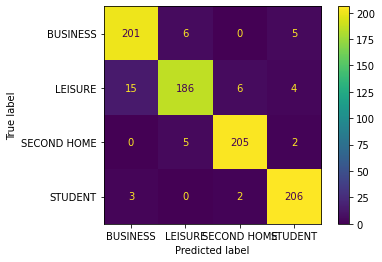

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

stacking.fit(X_train, y_train)
preds = stacking.predict(X_test)
print_metrics(preds, y_test, stacking)
print(f1_score(preds, y_test, average='weighted'))

### best model

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Model results:  StackingClassifier
              precision    recall  f1-score   support

    BUSINESS       0.92      0.95      0.94       212
     LEISURE       0.94      0.89      0.92       211
 SECOND HOME       0.96      0.97      0.96       212
     STUDENT       0.96      0.98      0.97       211

    accuracy                           0.95       846
   macro avg       0.95      0.95      0.95       846
weighted avg       0.95      0.95      0.95       846

Confusion matrix:
0.9482320547848865


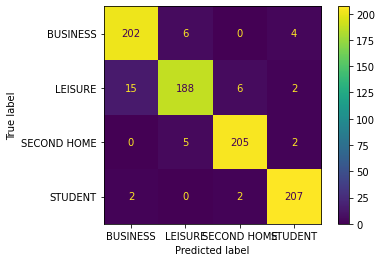

In [51]:
from sklearn.ensemble import StackingClassifier

clf1 = create_pipeline_without_clf('lgb',LGBMClassifier(learning_rate=0.01,max_depth=-1, min_samples_split=2, num_leaves=20, n_estimators= 500))
clf2 = create_pipeline_without_clf('svc',SVC(C= 10, degree= 2, gamma= 0.1, kernel= 'rbf'))
clf3 = create_pipeline_without_clf('log', LogisticRegression(C= 1.0, penalty= 'l2', max_iter=500))
clf4 = create_pipeline_without_clf('rfc',RandomForestClassifier(max_depth= None, min_samples_leaf= 1, min_samples_split= 2, n_estimators= 500))

estimators_list = [('lgb', clf1),('svc', clf2),('log', clf3),('rfc', clf4)]
stacking = StackingClassifier(estimators=estimators_list,  n_jobs=-1)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.20, random_state=42)

stacking.fit(X_train, y_train)
preds = stacking.predict(X_test)
print_metrics(preds, y_test, stacking)
print(f1_score(preds, y_test, average='weighted'))

stacking and voting classifier results the nearly same metrics but stacking is a little bit better based on weighted f1 score and f1-score for each individual category